In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
#Dropping unwanted features
df=df.drop('Loan_ID', axis = 1)
df=df.drop('Gender', axis = 1)

In [26]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df=df.dropna()
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df.drop_duplicates(inplace=True)
df.shape

(491, 11)

In [29]:
nos = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=df.columns.values.tolist()

for col in features:
    if df[col].dtypes in nos:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [30]:
w = df[list(df.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,9.458373,Loan_Amount_Term
8,8.827411,Credit_History
6,6.586619,LoanAmount
10,4.661317,Loan_Status
0,3.397250,Married
4,2.872810,ApplicantIncome
9,2.577982,Property_Area
1,1.931712,Dependents
5,1.522365,CoapplicantIncome
2,1.257205,Education


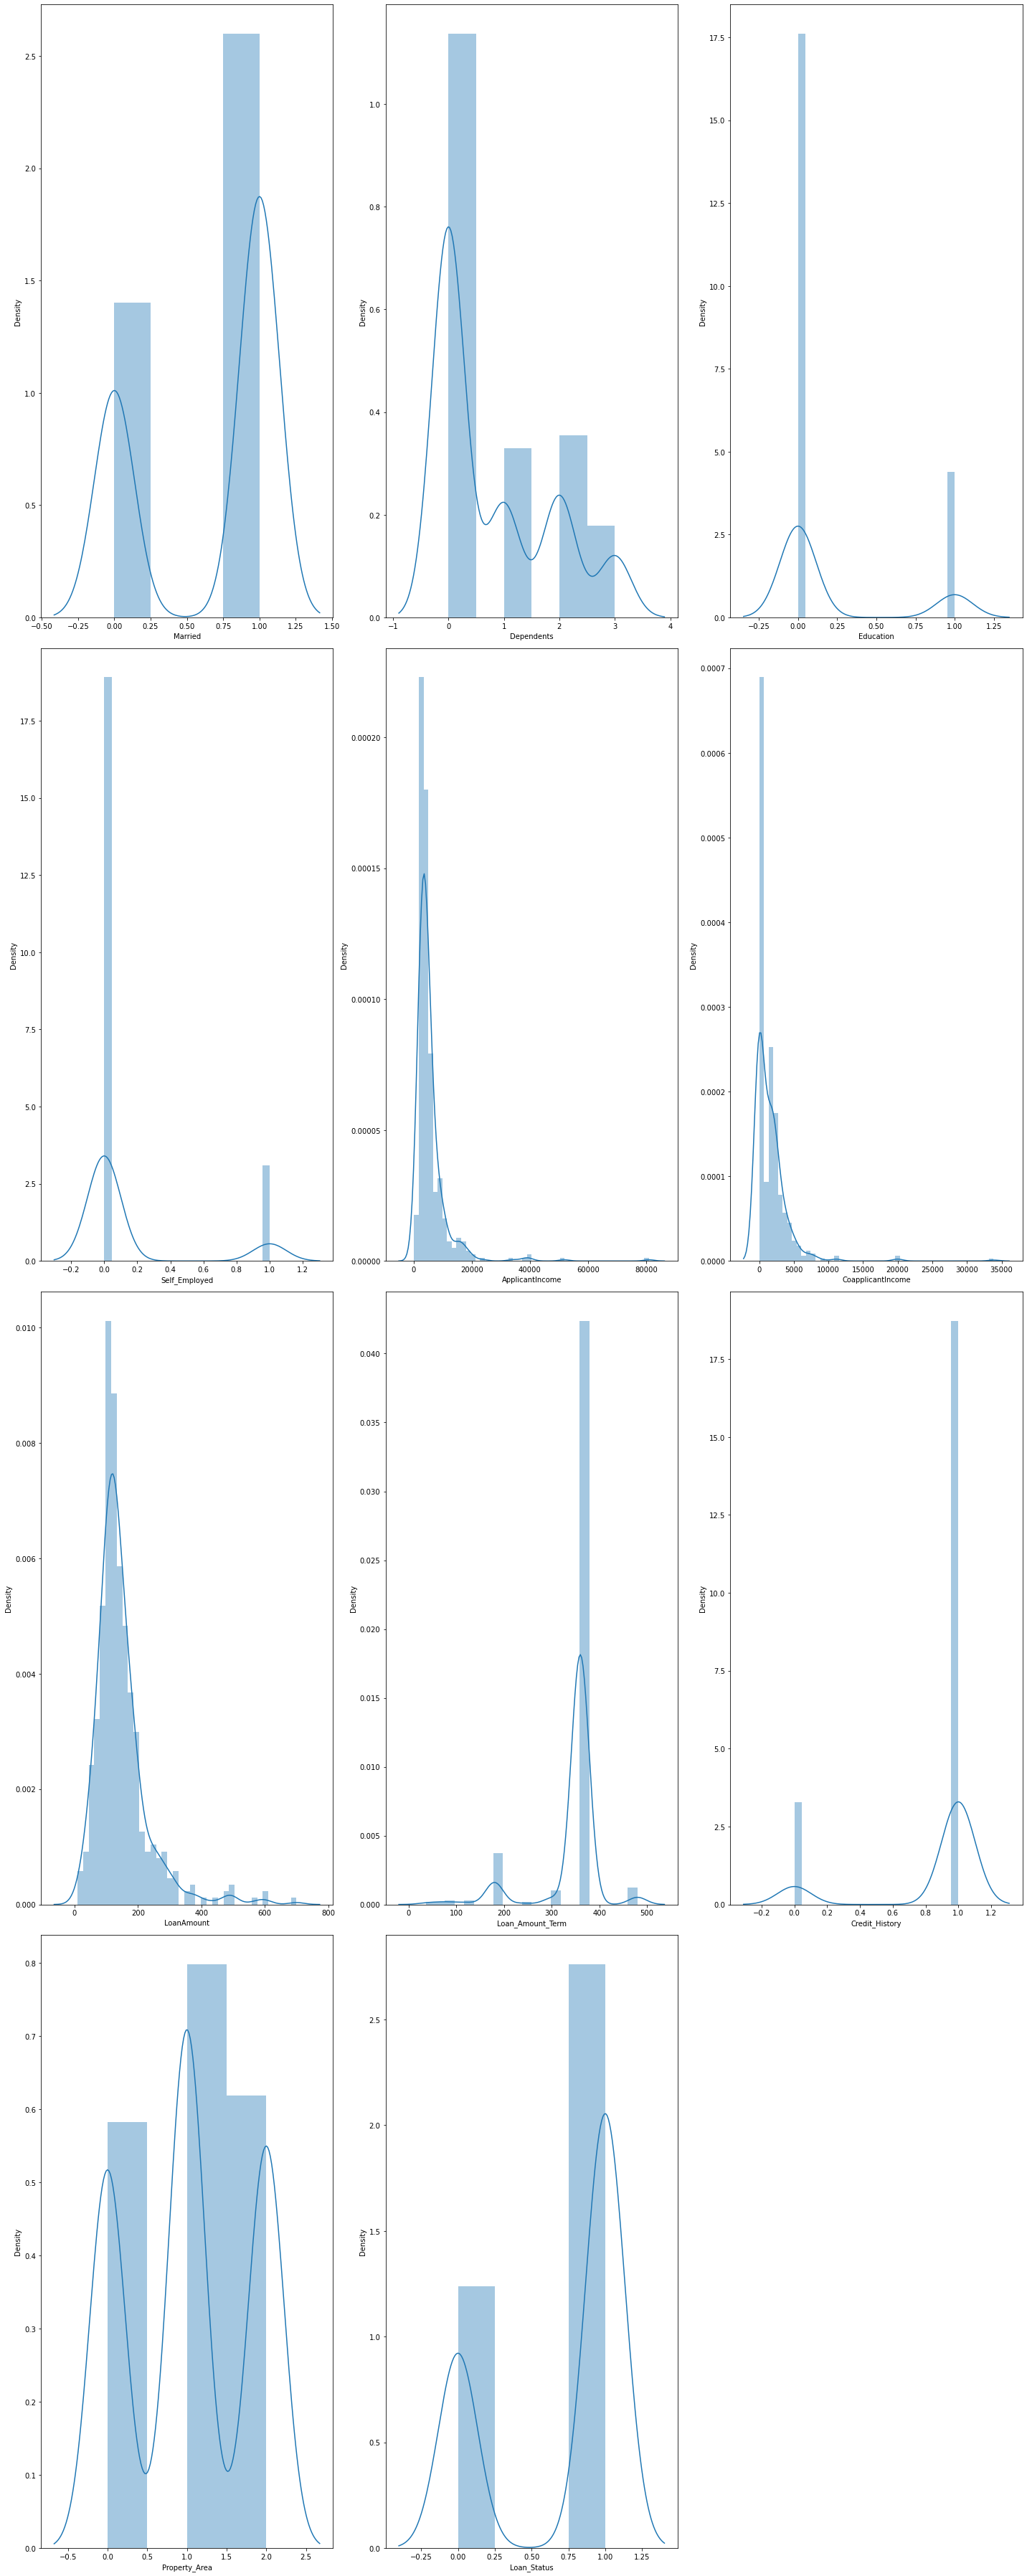

In [31]:
plt.figure(figsize=(20,50))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

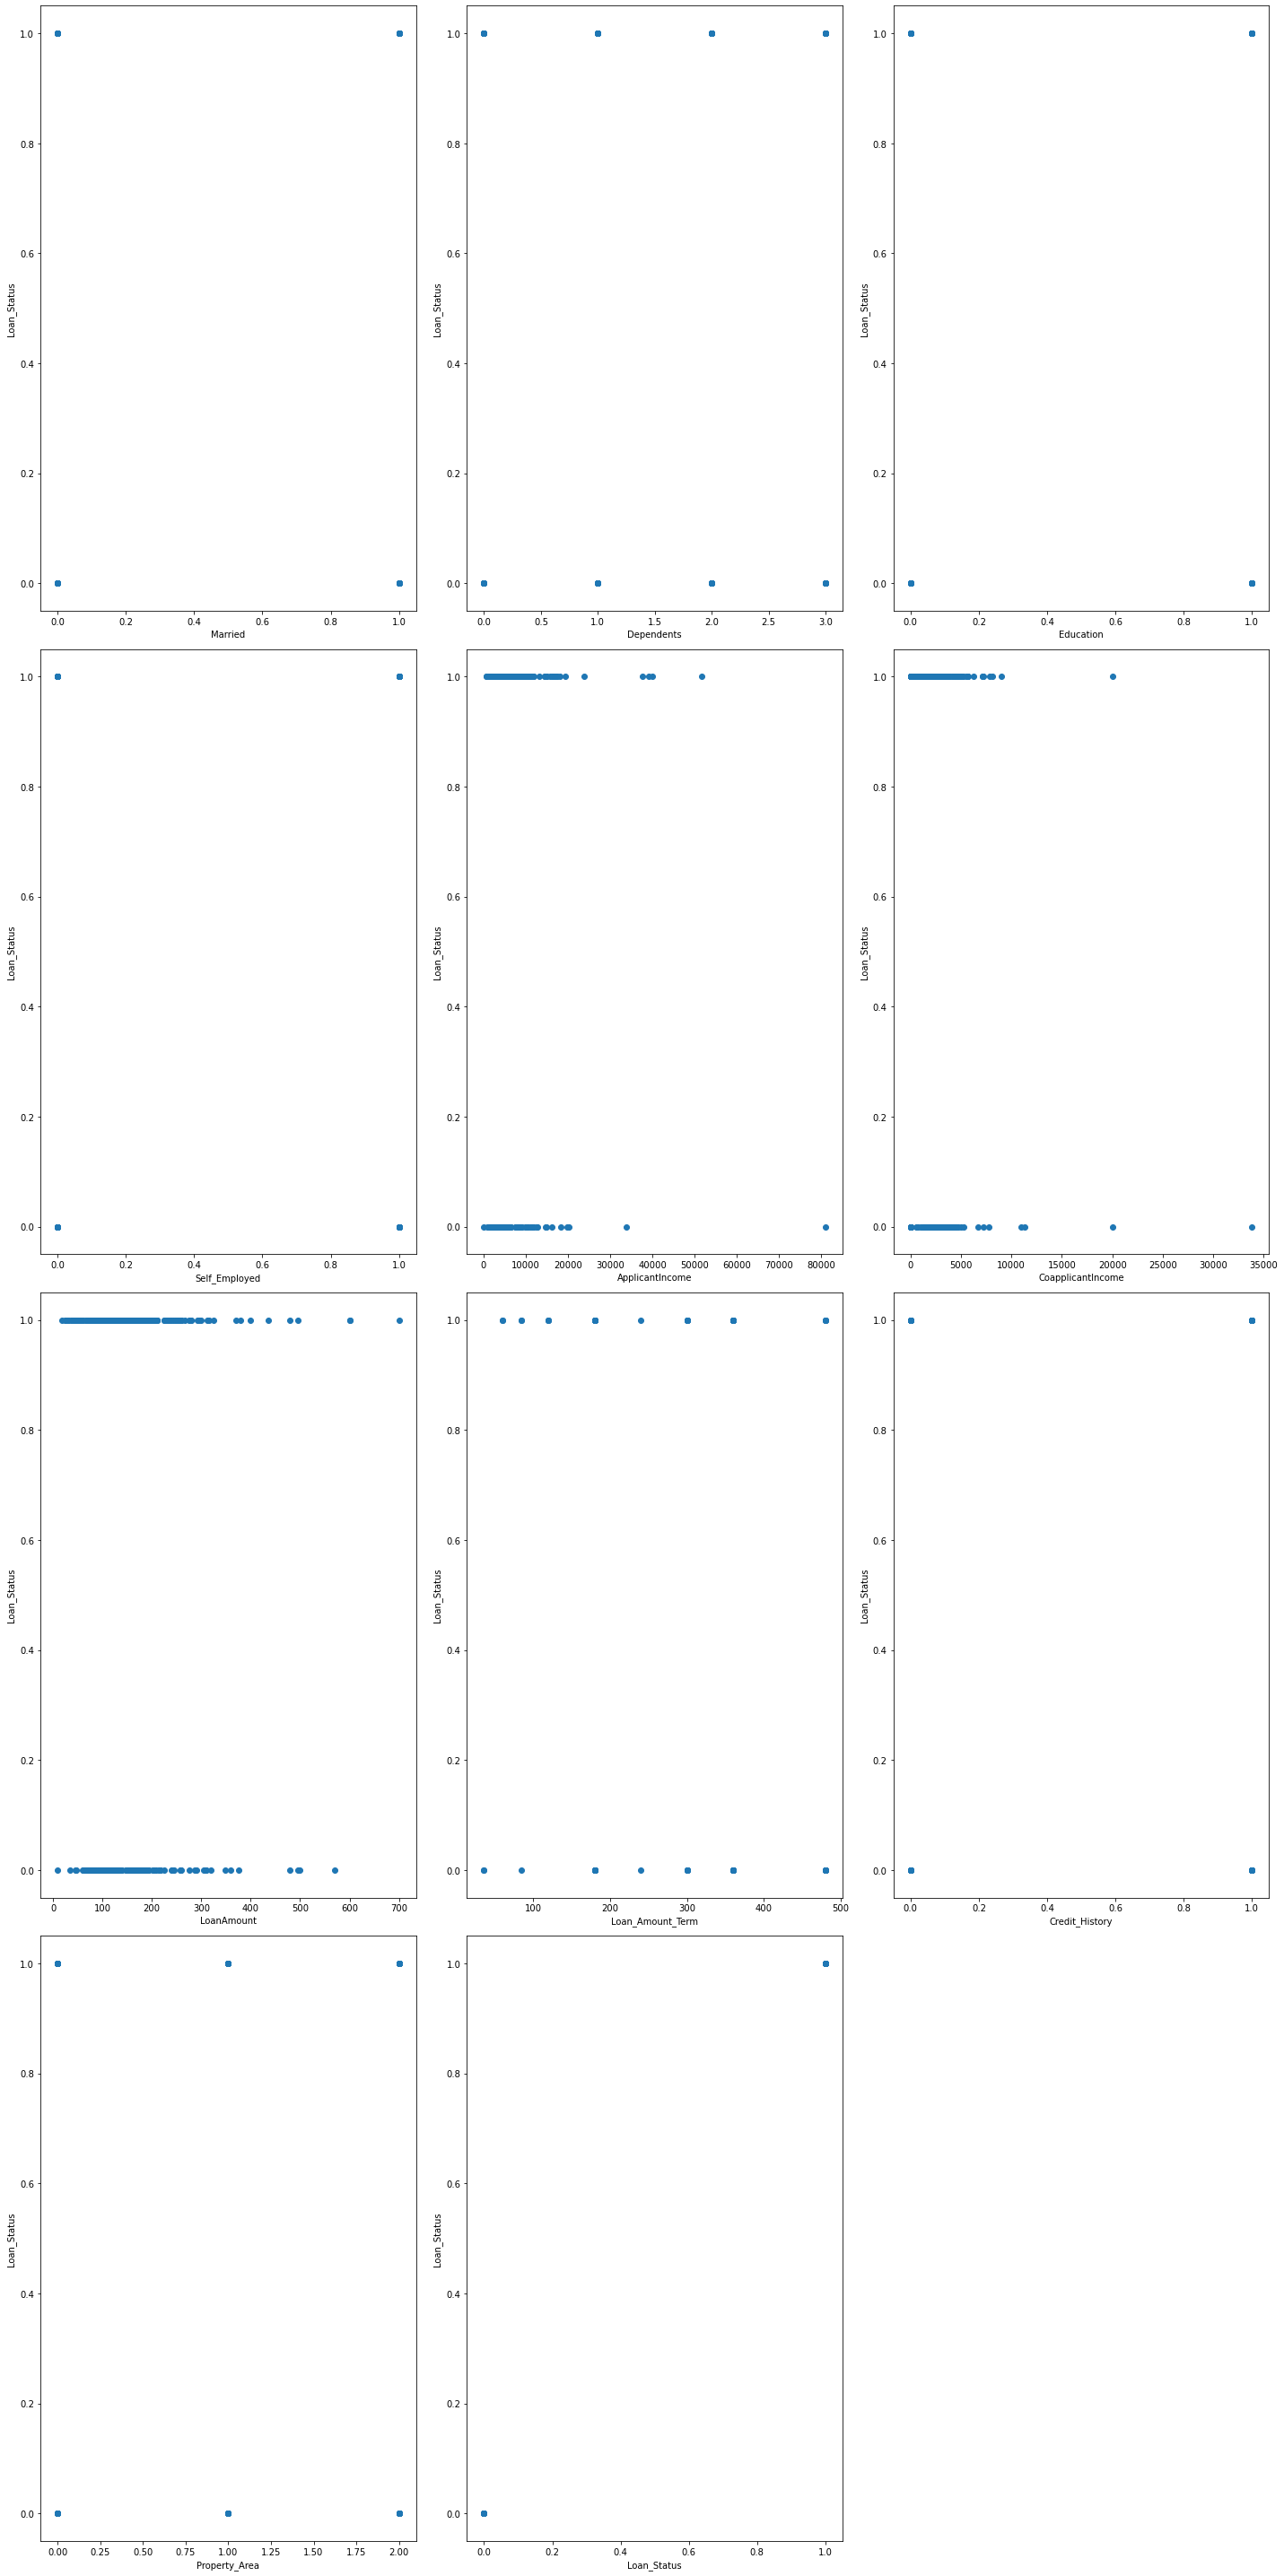

In [32]:
plt.figure(figsize=(20,40))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(df[column],df["Loan_Status"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan_Status', fontsize=10)
    plotnumber+=1
plt.tight_layout()

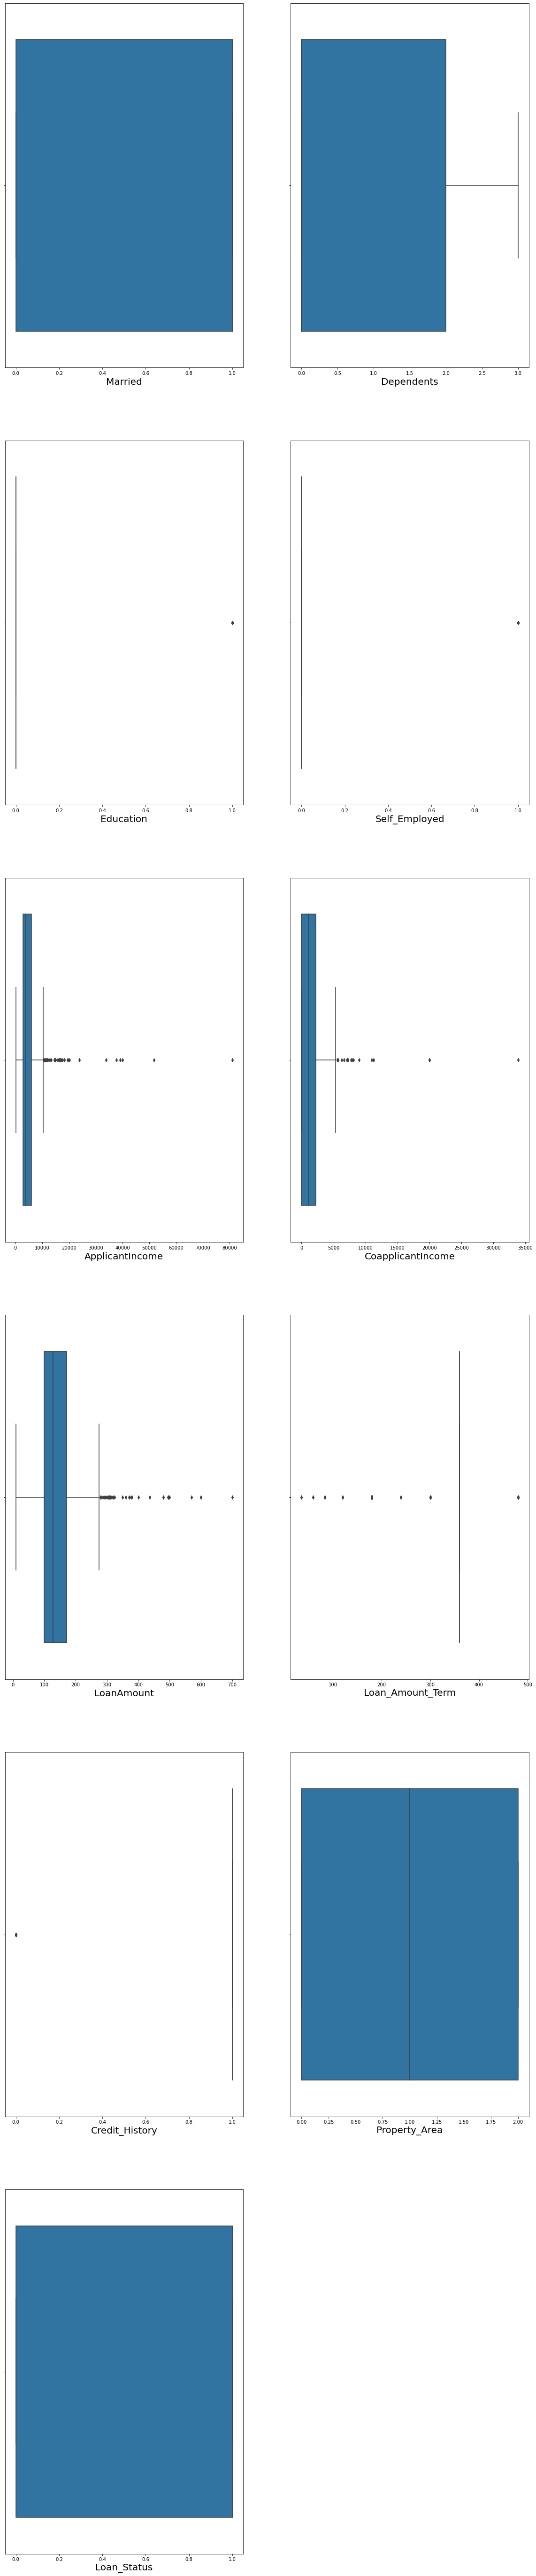

In [34]:
plt.figure(figsize=(20,100))
graph=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [36]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

iqr=q3-q1

In [38]:
highincome_applicant=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
index=np.where(df['ApplicantIncome']>highincome_applicant)
df=df.drop(df.index[index])
df.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
445,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
446,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
447,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
448,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [40]:
highincome_coapplicant=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
index=np.where(df['CoapplicantIncome']>highincome_coapplicant)
df=df.drop(df.index[index])
df.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
425,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
426,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
427,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
428,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [41]:
high_loanamt=(q3.LoanAmount+(1.5*iqr.LoanAmount))
index=np.where(df['LoanAmount']>high_loanamt)
df=df.drop(df.index[index])
df.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
418,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
419,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
420,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
421,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [42]:
high_term=(q3.Loan_Amount_Term+(1.5*iqr.Loan_Amount_Term))
index=np.where(df['LoanAmount']>high_term)
df=df.drop(df.index[index])
df.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
418,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
419,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
420,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
421,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


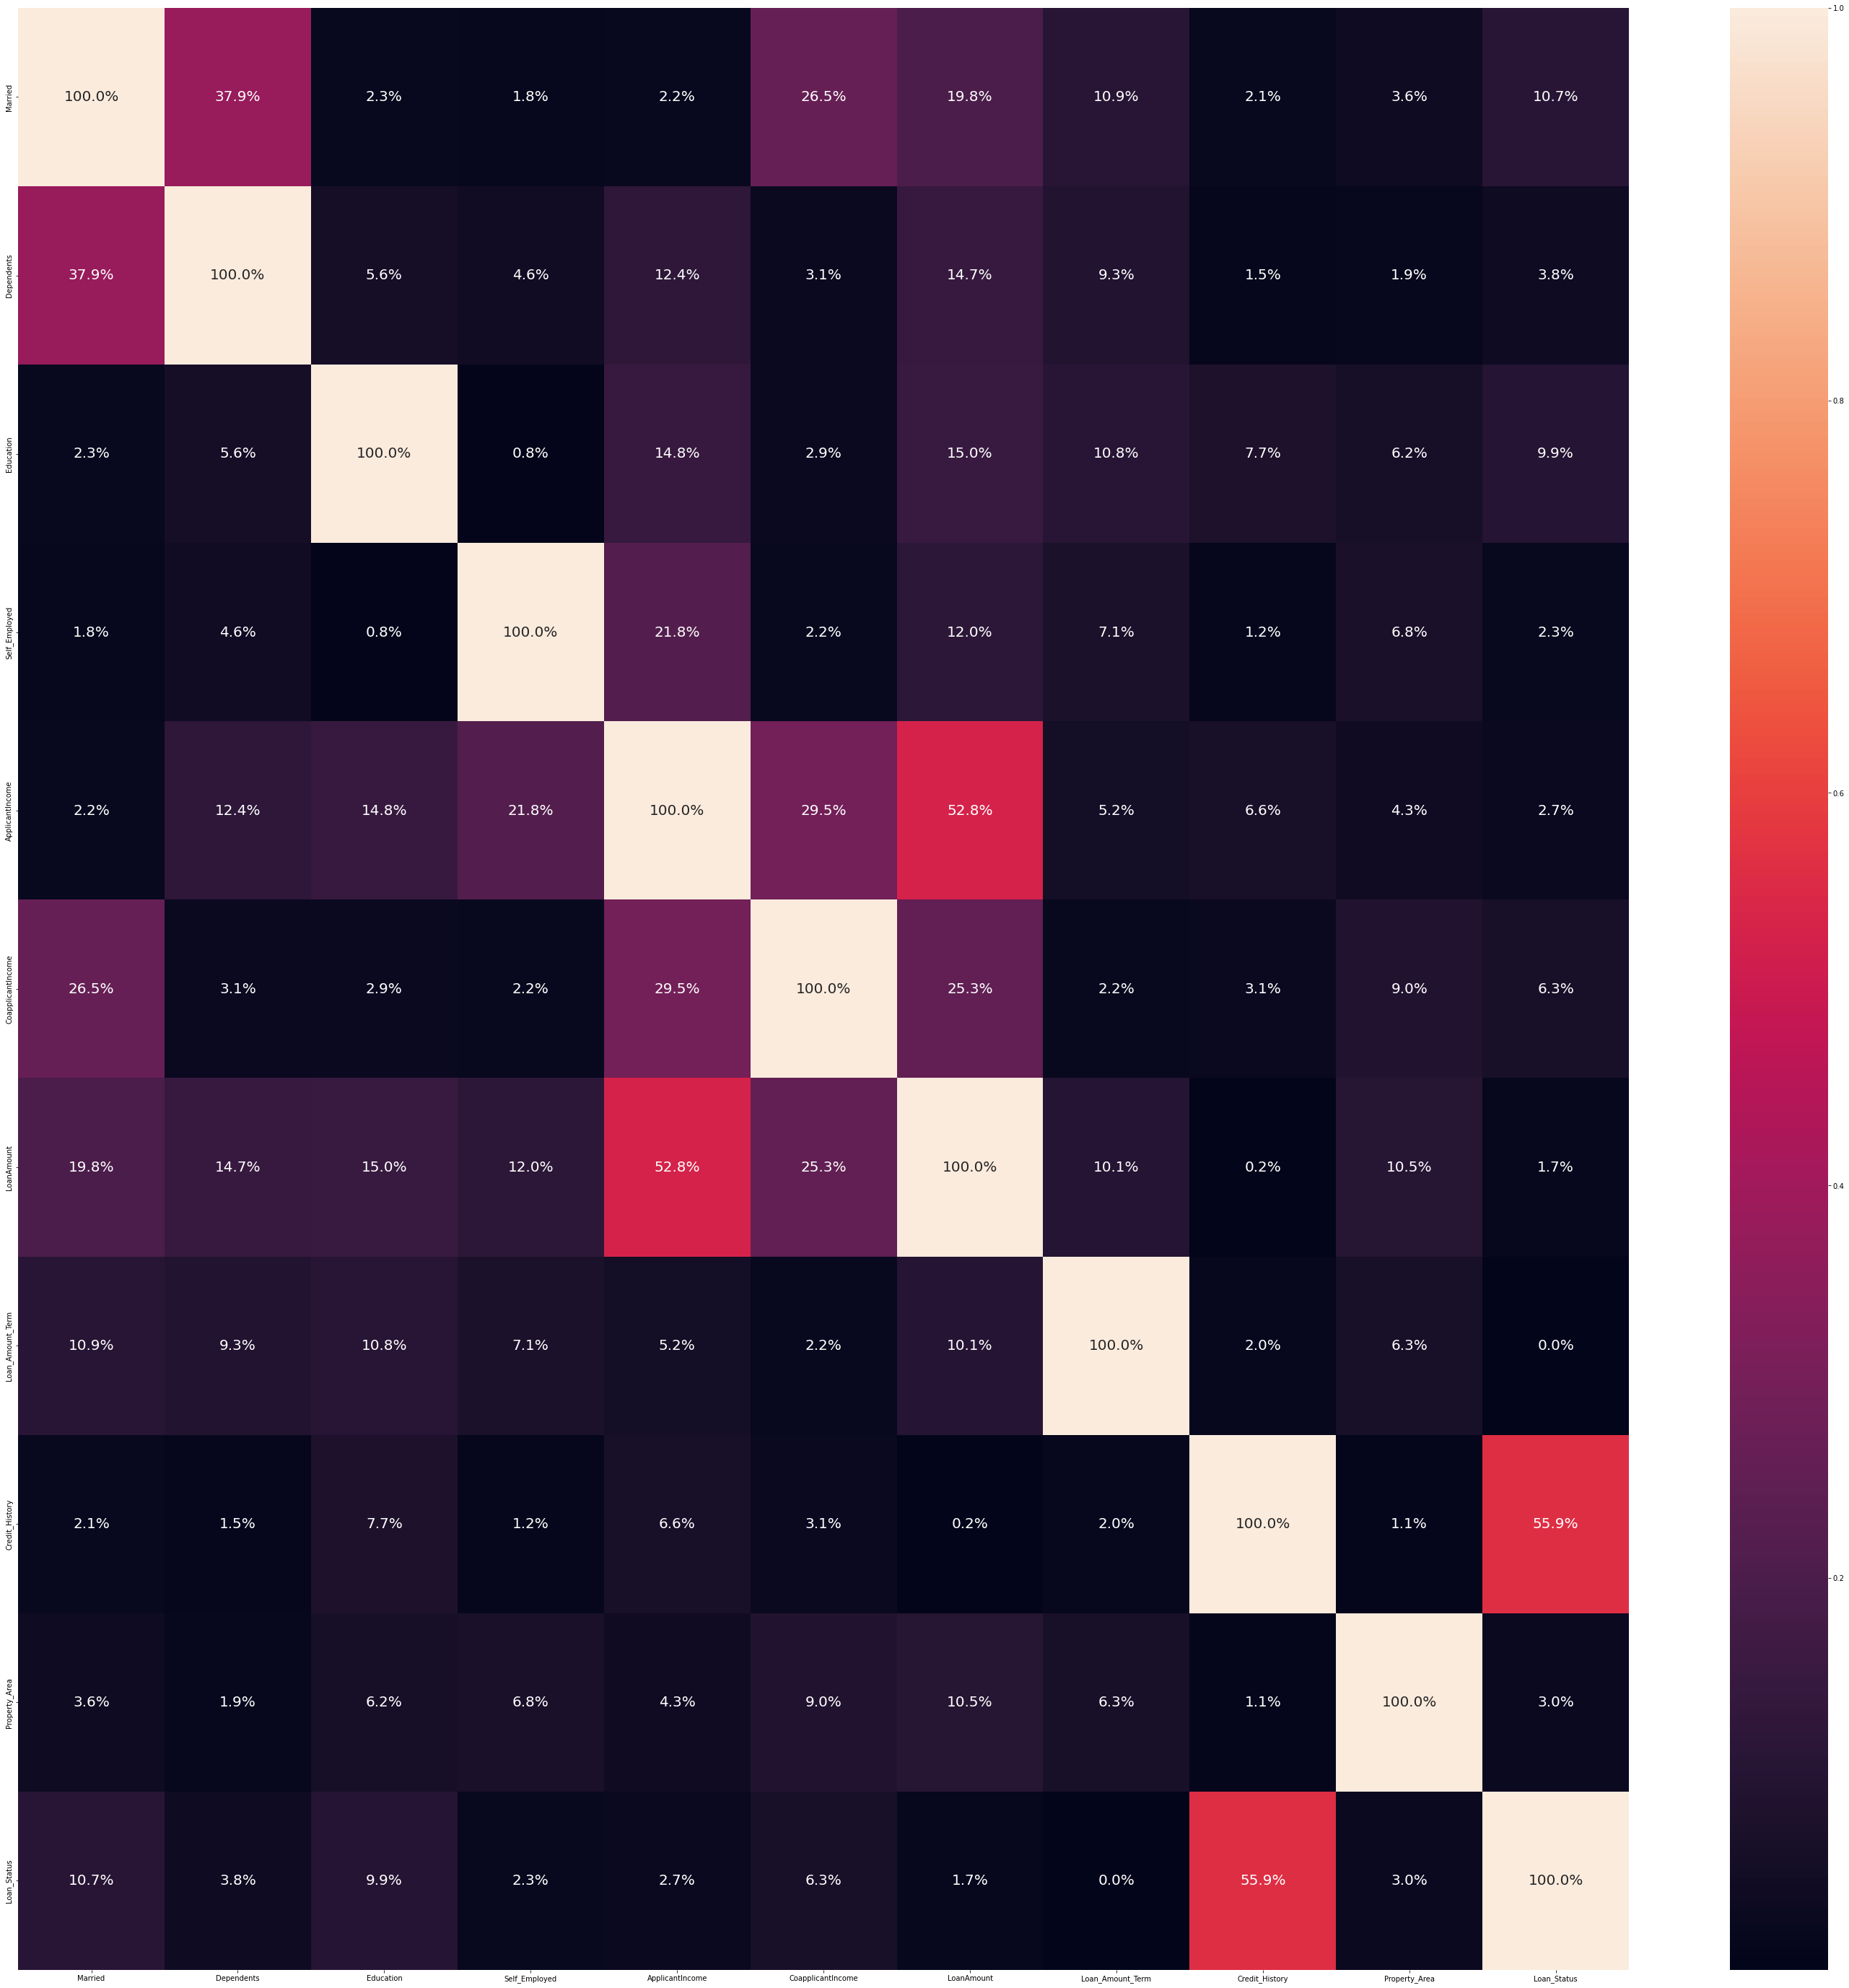

In [43]:
df_corr=df.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df.corr().abs(),annot=True, annot_kws={'size':20}, fmt='.1%')
plt.show()

In [44]:
df['Loan_Status'].value_counts()

1    294
0    129
Name: Loan_Status, dtype: int64

This clearly shows our data is little imbalanced, we need to balance our data using SMOTE

In [46]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [47]:
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(x)

In [48]:
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=44)

In [50]:
sm=SMOTE()

In [54]:
ove_smp=SMOTE(sampling_strategy=.75)
x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

In [55]:
y_train_ns.value_counts()

1    214
0    160
Name: Loan_Status, dtype: int64

# Model Building

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [58]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [59]:
lr.fit(x_train_ns,y_train_ns)
knn.fit(x_train_ns,y_train_ns)
dt.fit(x_train_ns,y_train_ns)
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [60]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.839622641509434
0.7735849056603774
0.7641509433962265
0.8490566037735849


From above scores we can see that the best model is RandomForest

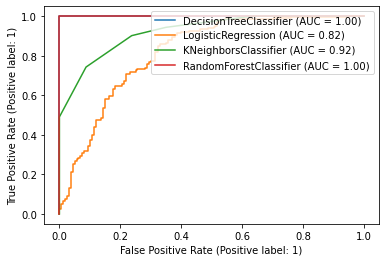

In [61]:
show=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train_ns,y_train_ns,ax=show.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=show.ax_)
plot_roc_curve(rf,x_train_ns,y_train_ns,ax=show.ax_)
plt.legend(prop={'size':10}, loc='upper right')
plt.show()

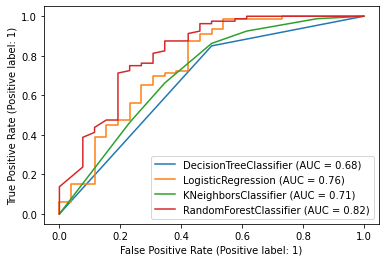

In [62]:
show=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=show.ax_)
plot_roc_curve(knn,x_test,y_test,ax=show.ax_)
plot_roc_curve(rf,x_test,y_test,ax=show.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [63]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [64]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.839622641509434
KNN : 0.7735849056603774
Decision Tree : 0.7641509433962265
Random Forest : 0.8490566037735849


In [65]:
#Hyperparameter tuning using GridSearchCV algorithm
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(2,5)
}

In [66]:
gsv=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [67]:
gsv.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [69]:
best_parameters=gsv.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [70]:
dtc=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)
rfc=RandomForestClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)

In [71]:
dtc.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

In [72]:
rfc.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

In [73]:
y1_pred=dtc.predict(x_test)
y2_pred=rfc.predict(x_test)

In [76]:
accuracy_score(y_test,y1_pred)

0.8584905660377359

In [77]:
accuracy_score(y_test,y2_pred)

0.8584905660377359

In [78]:
best_mod1 = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=3)
best_mod1.fit(x_train_ns,y_train_ns)
pred = best_mod1.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

84.90566037735849


In [79]:
a = np.array(y_test)
predicted = np.array(best_mod1.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_new

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
101,1,0
102,1,1
103,1,1
104,0,1
